In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# This script downloads the dataset from Kaggle and unzips it
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset = 'teejmahal20/airline-passenger-satisfaction'
api.dataset_download_files(dataset, path='.', unzip=True)



Dataset URL: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


In [4]:
# load training set and test set
train = pd.read_csv('train.csv', usecols=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'])

test = pd.read_csv('test.csv', usecols=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 
 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'])


In [5]:
from tensorflow.keras.utils import to_categorical
# Preprocess the data
train.dropna(inplace=True)
test.dropna(inplace=True)

le = LabelEncoder()
for column in train.select_dtypes(include=["object"]).columns:
    if column != 'satisfaction':
        train[column] = le.fit_transform(train[column])


train.head()

for column in test.select_dtypes(include=["object"]).columns:
    if column != 'satisfaction':
        test[column] = le.fit_transform(test[column])


le2 = LabelEncoder()
train_response = train['satisfaction']
train_response = le2.fit_transform(train_response)
train_response = to_categorical(train_response)
train.drop(columns=['satisfaction'], inplace=True,  axis=1)

test_response = test['satisfaction']
test_response = le2.fit_transform(test_response)
test_response = to_categorical(test_response)

test.drop(columns=['satisfaction'], inplace=True,  axis=1)


In [6]:

# Set the learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Define early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)


history = model.fit(train, train_response, epochs=30, callbacks=[early_stopping])

results = model.evaluate(test, test_response)
print("Test accuracy: ", results[1])

Epoch 1/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6326 - loss: 1.4938
Epoch 2/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7288 - loss: 0.6419
Epoch 3/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7498 - loss: 0.5556
Epoch 4/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7598 - loss: 0.5298
Epoch 5/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7632 - loss: 0.5161
Epoch 6/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7703 - loss: 0.5066
Epoch 7/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7716 - loss: 0.5011
Epoch 8/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7786 - loss: 0.4920
Epoch 9/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7749 - loss: 0.4947
Epoch 10/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7809 - loss: 0.4904
Epoch 11/30
3238/3238 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7774 - loss: 0.4913
Epoch 12/30
3238/3238 ━━━━━━━━

In [7]:
from sklearn.metrics import precision_score, f1_score

# Predict and calculate precision and F1 score
test_predictions = model.predict(test)
test_predictions = np.argmax(test_predictions, axis=1)
test_true = np.argmax(test_response, axis=1)

precision = precision_score(test_true, test_predictions, average='weighted')
f1 = f1_score(test_true, test_predictions, average='weighted')

print("Precision: ", precision)
print("F1 Score: ", f1)




810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision:  0.7871559163485229
F1 Score:  0.7872578838714492


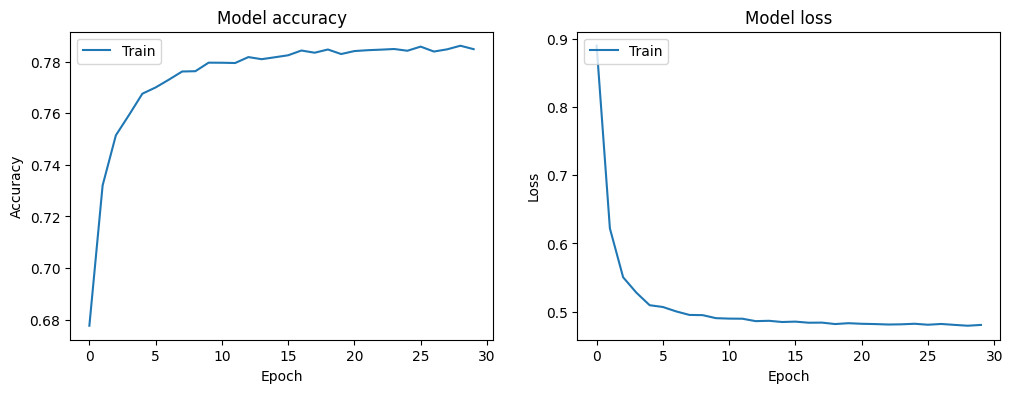

In [12]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')